# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = df['Mouse ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_unique = df[df.duplicated(subset=['Mouse ID', 'Timepoint'])]
mice_unique

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mice_unique_all = df[df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
mice_unique_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_df = df.drop_duplicates(subset='Mouse ID', keep='first')
clean_df = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
# i was confused on which exactly i was supposed to do so i did both of these.
print(unique_df)
print(clean_df)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
0                   45.0                 0  
10                  45.0         

In [6]:
# Checking the number of mice in the clean DataFrame.
unique_count = unique_df['Mouse ID'].count()
clean_count = clean_df['Mouse ID'].count()
clean_unique = clean_df['Mouse ID'].nunique()
print(unique_count)
print(clean_count)
print(clean_unique)
#Also wasnt sure which way this one was supposed to be done so i did it a few different ways

249
1888
249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean_TV = grouped.mean()
median_TV = grouped.median()
varaince_TV = grouped.var()
sd_TV = grouped.std()
sem_TV = grouped.sem()

stats_summary = pd.DataFrame({
    'Mean' : mean_TV,
    'Median' : median_TV,
    'Variance' : varaince_TV,
    'Standard Deviation' : sd_TV,
    'SEM' : sem_TV
})
stats_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean_TV='mean', median_TV='median', varaince_TV= 'var', sd_TV='std', sem_TV='sem')
agg_summary

,mean_TV,median_TV,varaince_TV,sd_TV,sem_TV
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Total Number of Mouse ID/Timepoints for Each Drug Regimen'}, xlabel='Drug Regimen'>

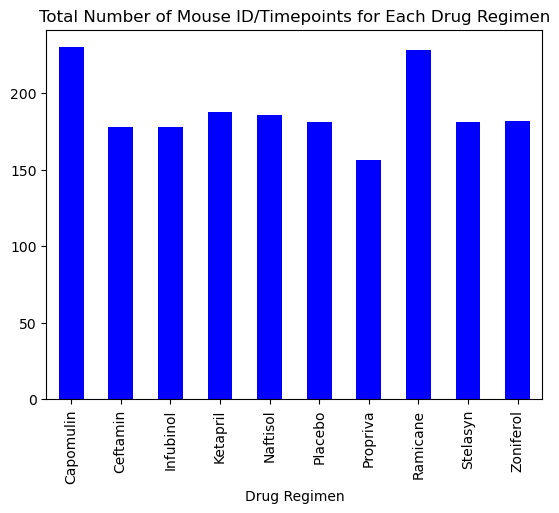

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_df.groupby('Drug Regimen').size()
drug_regimen.plot(kind='bar', color='blue', title='Total Number of Mouse ID/Timepoints for Each Drug Regimen')

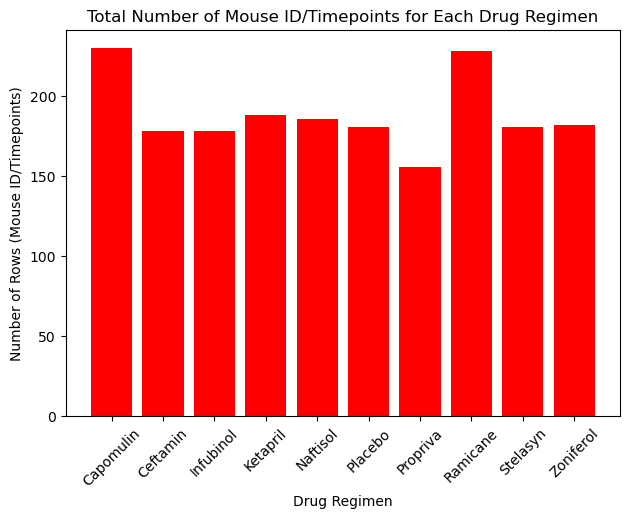

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = clean_df.groupby('Drug Regimen').size()
plt.bar(drug_regimen.index, drug_regimen.values, color='red')
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


<Axes: title={'center': 'Distribution of Unique Female vs Male Mice Used in the Study'}, ylabel='count'>

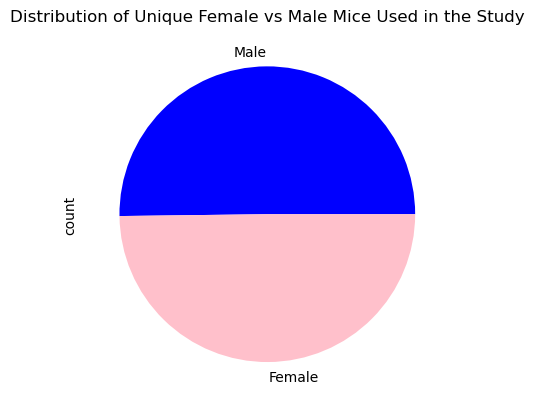

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
genders = clean_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()


# Make the pie chart
genders.plot(kind='pie', colors=['blue', 'pink'], title='Distribution of Unique Female vs Male Mice Used in the Study')

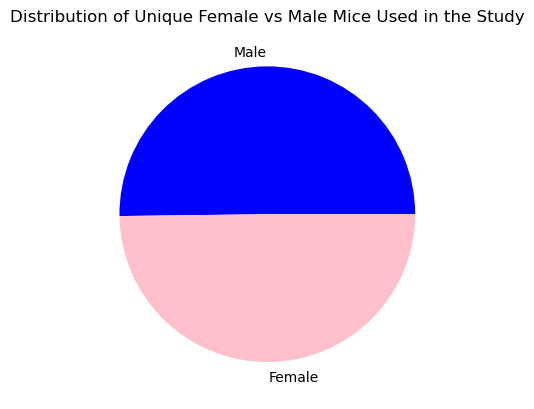

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
genders = clean_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()

# Make the pie chart
plt.pie(genders, labels=genders.index, colors=['blue', 'pink'])
plt.title('Distribution of Unique Female vs Male Mice Used in the Study')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
filtered_df = clean_df[clean_df['Drug Regimen'].isin(treatments)]
final_tumor_volumes = filtered_df.groupby('Mouse ID').last()['Tumor Volume (mm3)']
final_tumor_volumes = final_tumor_volumes.reset_index()

final_tumor_volumes.columns = ['Mouse ID', 'Final Tumor Volume']
final_tumor_volumes
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tv_df = clean_df.merge(final_tumor_volumes)
tv_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,62.754451
810,z581,Infubinol,Female,24,25,30,56.286750,2,62.754451
811,z581,Infubinol,Female,24,25,35,58.628399,3,62.754451
812,z581,Infubinol,Female,24,25,40,60.053740,3,62.754451


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
unique_treatments = clean_df['Drug Regimen'].unique()
treatments_list = unique_treatments.tolist()
treatments_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
grouped_regimens = df.groupby('Drug Regimen')
for drug, group in grouped_regimens:
    quartiles = group['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    outliers = group[(group['Tumor Volume (mm3)'] < lower_bound) | (group['Tumor Volume (mm3)'] > upper_bound)]
    print(f"Drug Regimen: {drug}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print(outliers[['Mouse ID', 'Tumor Volume (mm3)']])
    print("-" * 40)
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments_list:
    drug_data = clean_df[clean_df['Drug Regimen'] == drug][['Mouse ID', 'Tumor Volume (mm3)']]
    tumor_vol.append((drug, drug_data))

    # add subset
tumor_vol2 = []
subset_columns = ['Mouse ID', 'Tumor Volume (mm3)']
for drug in treatments_list:
    drug_data = clean_df[df['Drug Regimen'] == drug][subset_columns]
    tumor_vol2.append((drug, drug_data))


    # Determine outliers using upper and lower bounds
outliers = clean_df[(clean_df['Tumor Volume (mm3)'] < lower_bound) | (clean_df['Tumor Volume (mm3)'] > upper_bound)]
outliers

Drug Regimen: Capomulin
IQR: 7.314067135000002
Lower Bound: 26.714832162499995
Upper Bound: 55.9711007025
Number of outliers: 2
   Mouse ID  Tumor Volume (mm3)
18     s185           25.472143
19     s185           23.343598
----------------------------------------
Drug Regimen: Ceftamin
IQR: 9.593010457500007
Lower Bound: 32.81891142624998
Upper Bound: 71.19095325625001
Number of outliers: 0
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []
----------------------------------------
Drug Regimen: Infubinol
IQR: 10.002090667500006
Lower Bound: 32.309217298749985
Upper Bound: 72.31757996875001
Number of outliers: 0
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []
----------------------------------------
Drug Regimen: Ketapril
IQR: 12.637963814999999
Lower Bound: 29.27604157
Upper Bound: 79.82789683
Number of outliers: 0
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []
----------------------------------------
Drug Regimen: Naftisol
IQR: 12.6

C:\Users\chase\AppData\Local\Temp\ipykernel_29100\1965421435.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drug_data = clean_df[df['Drug Regimen'] == drug][subset_columns]
C:\Users\chase\AppData\Local\Temp\ipykernel_29100\1965421435.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drug_data = clean_df[df['Drug Regimen'] == drug][subset_columns]
C:\Users\chase\AppData\Local\Temp\ipykernel_29100\1965421435.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drug_data = clean_df[df['Drug Regimen'] == drug][subset_columns]
C:\Users\chase\AppData\Local\Temp\ipykernel_29100\1965421435.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drug_data = clean_df[df['Drug Regimen'] == drug][subset_columns]
C:\Users\chase\AppData\Local\Temp\ipykernel_29100\1965421435.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drug_data 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


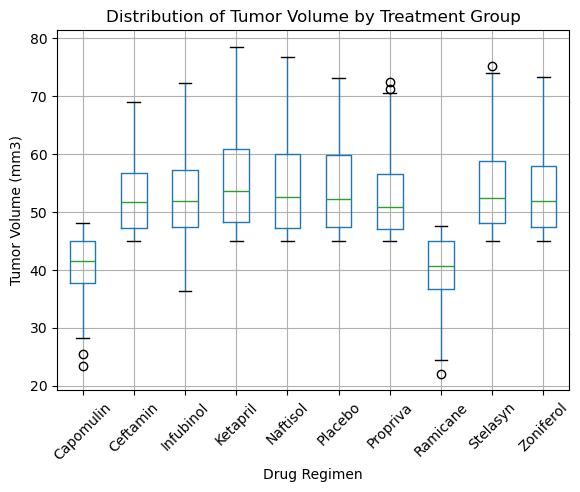

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
clean_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.show()

## Line and Scatter Plots

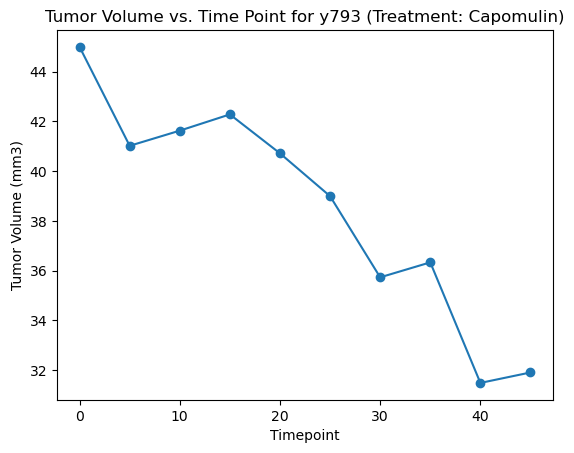

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'y793'
regimen = 'Capomulin'

mouse_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == regimen)]
mouse_data= mouse_data.sort_values('Timepoint')
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f'Tumor Volume vs. Time Point for {mouse_id} (Treatment: {regimen})')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


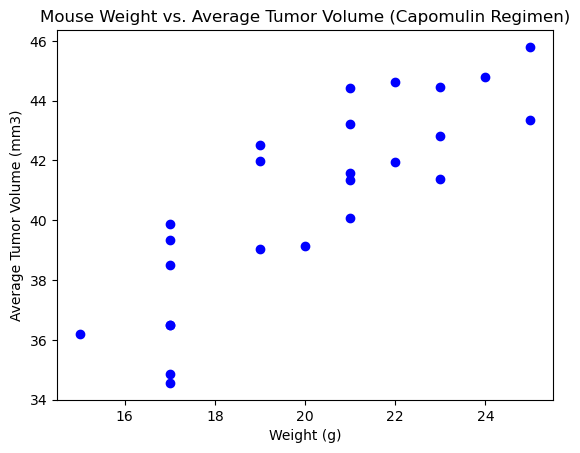

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_avg_tumor = capomulin_data.groupby('Mouse ID').agg(
    avg_tumor_volume = ('Tumor Volume (mm3)', 'mean'),
    weight=('Weight (g)', 'first'))
plt.scatter(capomulin_avg_tumor['weight'], capomulin_avg_tumor['avg_tumor_volume'], color='blue', marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

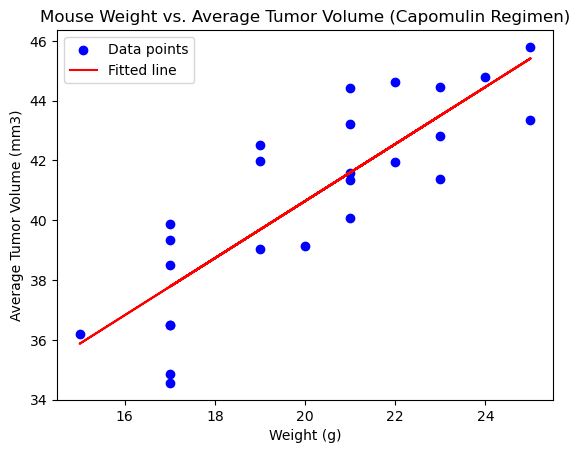

The Correlation coefficent is 0.8419363424694722


In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = capomulin_avg_tumor['weight']
avg_tumor_volume = capomulin_avg_tumor['avg_tumor_volume']
correlation = weight.corr(avg_tumor_volume)
slope, intercept, r_value, p_value, std_err = st.linregress(weight, avg_tumor_volume)
plt.scatter(weight, avg_tumor_volume, color='blue', label='Data points')
plt.plot(weight, slope * weight + intercept, color='red', label='Fitted line')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()
print(f'The Correlation coefficent is {correlation}')